In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')
df_ss = pd.read_csv('/kaggle/input/playground-series-s3e5/sample_submission.csv')

In [3]:
df_train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
df_train.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [11]:
features = df_train.select_dtypes(include=np.number).columns.tolist()

features.remove('Id')
features.remove('quality')

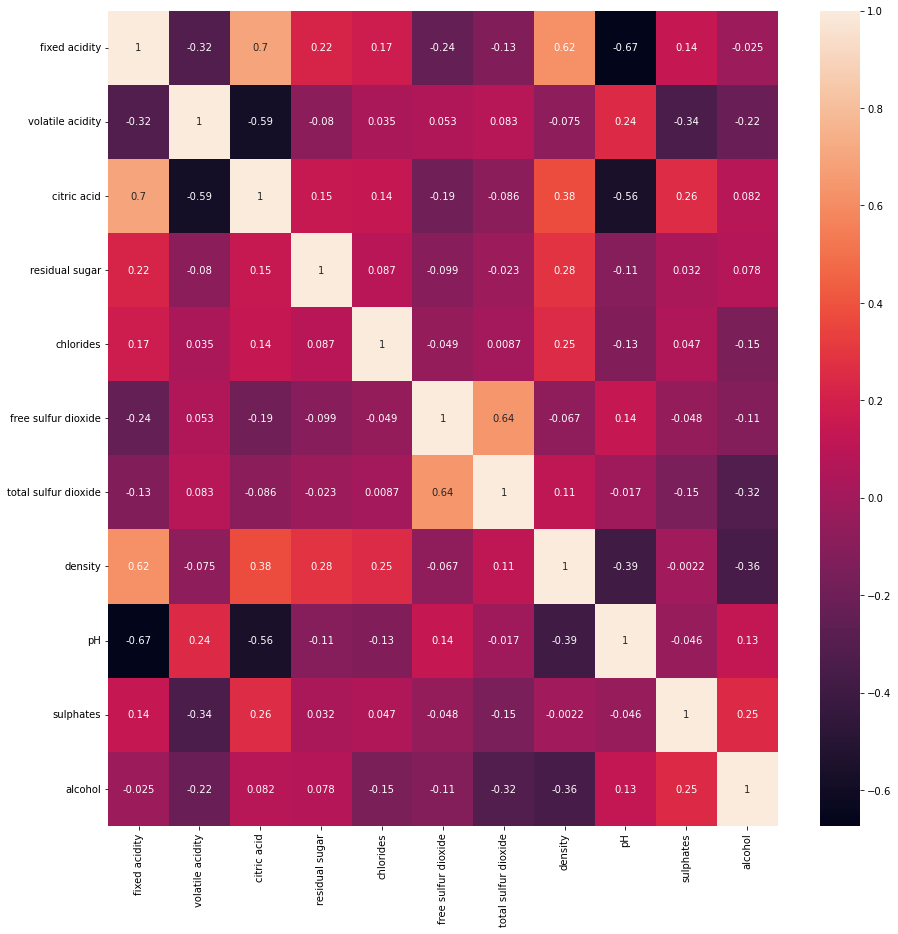

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train[features].corr(),annot=True)
plt.show()

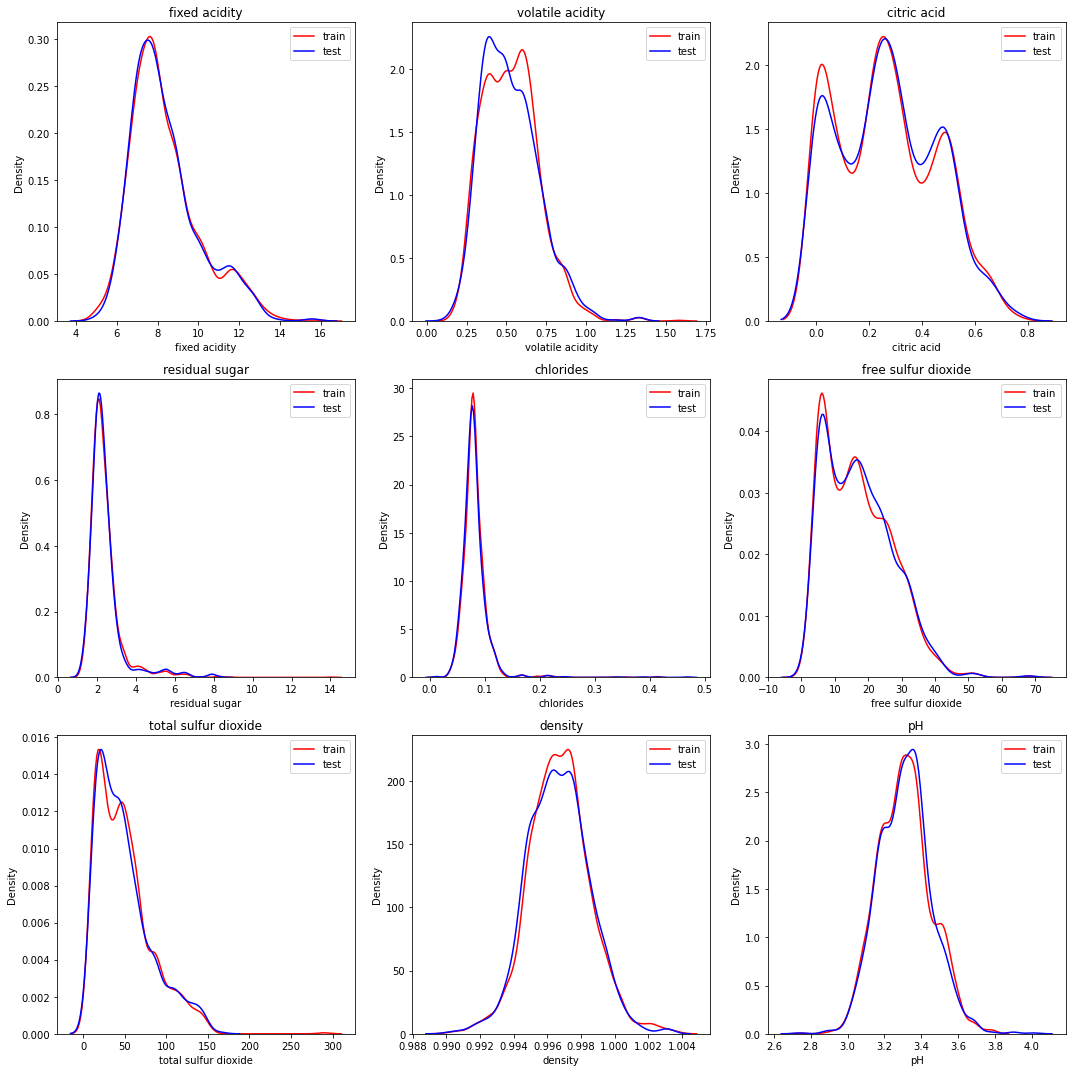

In [15]:
fig, axes = plt.subplots(nrows=int((len(features)/3)), ncols=3, figsize=(15, 15))
for ax, f in zip(axes.flat, features):
    sns.kdeplot(df_train[f], color='r', label='train', ax=ax)
    sns.kdeplot(df_test[f], color='b', label='test', ax=ax)
#     sns.kdeplot(df_original[f], color='g', label='original', ax=ax)
    ax.set_title(f)
    ax.legend()
plt.tight_layout()
plt.show()

In [16]:
df_train.quality.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

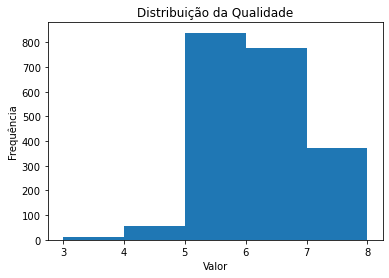

In [17]:
plt.hist(df_train.quality, bins=5)
plt.title("Distribuição da Qualidade")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

In [19]:
robustS = RobustScaler()
df_train[features] = robustS.fit_transform(df_train[features])
df_test[features] = robustS.transform(df_test[features])
Xdf_train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0.025,-0.08,0.424242,0.000000,-0.315789,0.8750,-0.116279,-0.445455,0.105263,0.941176,1.333333,6
1,1,0.675,-0.88,1.454545,0.142857,0.684211,0.8750,0.534884,0.836364,0.052632,0.352941,1.800000,6
2,2,-0.425,-0.04,-0.666667,-0.142857,-1.052632,-0.8125,-0.744186,-0.045455,1.105263,0.705882,0.800000,7
3,3,0.075,1.40,-0.090909,0.571429,0.263158,-0.3125,0.488372,0.272727,-0.578947,-0.470588,-0.200000,5
4,4,0.275,-0.64,0.151515,0.142857,0.000000,-0.3750,0.023256,-1.027273,-0.578947,4.411765,-0.400000,6


In [35]:
X_train = df_train[features]
y_train = df_train.quality

rf = RandomForestClassifier(100, min_samples_leaf=5, oob_score=True, random_state=42)
rf.fit(X_train, y_train);

In [36]:
rf.oob_score_

0.5928988326848249

In [40]:
pred = rf.predict(df_test[features])

def save_sub(df):
    df.to_csv('submission.csv', index=False)
    !head submission.csv

In [47]:
sub = df_ss.copy()

sub['quality'] = pred

save_sub(sub)

Id,quality
2056,5
2057,6
2058,6
2059,6
2060,5
2061,6
2062,5
2063,6
2064,6


In [48]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Id       1372 non-null   int64
 1   quality  1372 non-null   int64
dtypes: int64(2)
memory usage: 21.6 KB
